# Mean CDA Amplitude
## Descriptive Stats and Visualizations

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Global Parameters

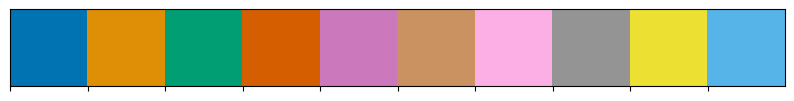

In [3]:
sns.palplot(sns.color_palette('colorblind'))

In [4]:
print(sns.color_palette('colorblind').as_hex())

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


In [5]:
# Set the custom palette (colorblind-friendly colors)
groups_palette = ["#0072B2", "#009E73", "#E69F00", "#999999", "#CC79A7"]
sns.set_palette(groups_palette)

# Set the font size
plt.rcParams['font.size'] = 20  # Set the base font size
plt.rcParams['axes.titlesize'] = 20  # Font size for plot titles
plt.rcParams['axes.labelsize'] = 20  # Font size for axis labels
plt.rcParams['xtick.labelsize'] = 18  # Font size for the x-tick labels
plt.rcParams['ytick.labelsize'] = 18  # Font size for the y-tick labels
plt.rcParams['legend.fontsize'] = 18  # Font size for legends

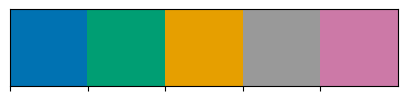

In [5]:
sns.palplot(sns.color_palette(groups_palette))

##  Import and Inspect the Data

In [6]:
avg_cda_condition = pd.read_excel("avg_cda_condition.xlsx")
avg_cda_condition.head()

,id,mean_cda,stimuli_count,hemisphere,group
0,101,-2.699969,3_stim,left,IUD
1,103,-0.284679,3_stim,left,IUD
2,104,-1.676450,3_stim,left,IUD
3,105,-0.072374,3_stim,left,IUD
4,106,-0.945670,3_stim,left,IUD


### Rename values for clarity

In [7]:
# Map stimulus count labels 
stim_count_labels = {
    '3_stim': '3 Stimuli',
    '4_stim': '4 Stimuli'
}

# Update values
avg_cda_condition['stimuli_count'] = avg_cda_condition['stimuli_count'].map(stim_count_labels)

### Define the order of groups and conditions

In [8]:
group_order = ['M','NCF', 'NCL', 'OC', 'IUD'] 
stim_count_order = ['3 Stimuli', '4 Stimuli']
hf_order = ['left', 'right']

In [7]:
# Subjects' data is already removed
len(avg_cda_condition["id"].unique())

165

##  Descriptive Stats

In [8]:
# Convert columns to ordered categorical types
desc_group_cond = avg_cda_condition.copy()
desc_group_cond['group'] = pd.Categorical(desc_group_cond['group'], categories = group_order, ordered = True)
desc_group_cond['stimuli_count'] = pd.Categorical(desc_group_cond['stimuli_count'], categories = stim_count_order, ordered = True)
desc_group_cond['hemisphere'] = pd.Categorical(desc_group_cond['hemisphere'], categories = hf_order, ordered = True)

descriptive_stats = desc_group_cond.groupby(['group','stimuli_count', 'hemisphere']).agg({
    'mean_cda': ['count', 'mean', 'std']
}).reset_index()


descriptive_stats

group stimuli_count hemisphere mean_cda                    
                                     count      mean       std
0      M     3 Stimuli       left       32 -0.536967  1.189881
1      M     3 Stimuli      right       32 -0.693339  1.075174
2      M     4 Stimuli       left       32 -0.673934  1.077178
3      M     4 Stimuli      right       32 -0.309379  1.225571
4    NCF     3 Stimuli       left       33 -0.810911  1.418904
5    NCF     3 Stimuli      right       33 -1.094381  1.262603
6    NCF     4 Stimuli       left       33 -1.211268  1.356133
7    NCF     4 Stimuli      right       33 -0.022338  1.580435
8    NCL     3 Stimuli       left       35 -0.650131  1.266222
9    NCL     3 Stimuli      right       35 -0.882792  1.719168
10   NCL     4 Stimuli       left       35 -0.773012  1.520671
11   NCL     4 Stimuli      right       35 -0.648753  1.608570
12    OC     3 Stimuli       left       37 -0.627847  1.395386
13    OC     3 Stimuli      right       37 -0.678513  1.408929
14    OC     4 Stimuli       left       37 -1.264481  1.652869
15    OC     4 Stimuli      right       37 -0.530072  2.012156
16   IUD     3 Stimuli       left       28 -0.981229  1.315957
17   IUD     3 Stimuli      right       28 -0.521396  1.716240
18   IUD     4 Stimuli       left       28 -0.847577  1.314528
19   IUD     4 Stimuli      right       28 -0.774540  1.289449

In [10]:
# Save descriptive stats to excel if needed
descriptive_stats.to_excel("CDA_descriptive_stats.xlsx")

##  Visualizations

In [9]:
# Aggregate the data
cda_group = avg_cda_condition.groupby(['id', 'group']).agg({
    'mean_cda': 'mean'  
}).reset_index()


cda_stim_count = avg_cda_condition.groupby(['id', 'stimuli_count']).agg({
    'mean_cda': 'mean'  
}).reset_index()

cda_hf = avg_cda_condition.groupby(['id', 'hemisphere']).agg({
    'mean_cda': 'mean'  
}).reset_index()

/var/folders/y3/4pdg9fp120s38766sq9jgvxm0000gn/T/ipykernel_5840/3155655290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=cda_group, x='group', y='mean_cda', order=group_order, palette = groups_palette,


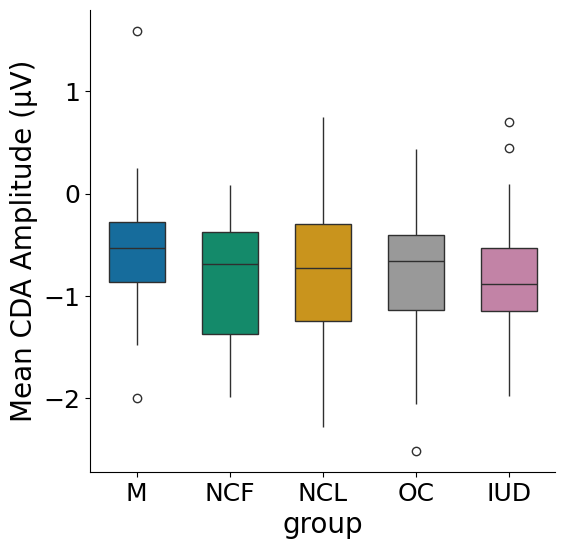

In [26]:
plt.figure(figsize = (6, 6))

ax = sns.boxplot(data=cda_group, x='group', y='mean_cda', order=group_order, palette = groups_palette,
                 width=0.6,
                 flierprops=dict(marker='o', markersize=6, markerfacecolor='none', linestyle='none'),
                capprops=dict(linewidth=0))
plt.ylabel('Mean CDA Amplitude (µV)')

sns.despine(top=True, right=True)

# Add scatter plot for outliers
#sns.stripplot(data=cda_group, x='group', y='mean_cda', order=group_order, color='black', size=5, alpha=0.5)

# Save figure if needed
plt.savefig("figures/CDA_group_boxplot.png")

plt.show()

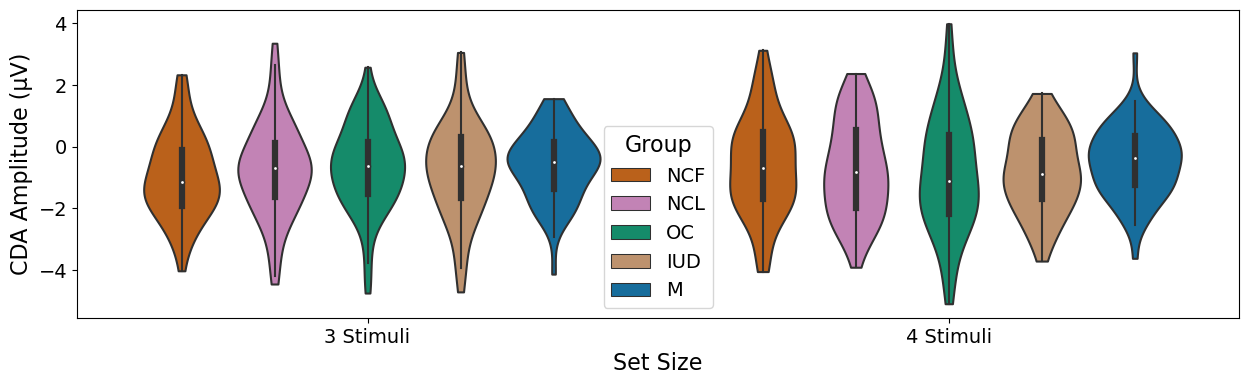

In [15]:
# Stimuli count and group
plt.figure(figsize = (15, 4))
sns.violinplot(x = 'stimuli_count', y = 'mean_cda', data = avg_cda_condition, hue = 'group', hue_order = group_order, order = stim_count_order, cut = 0, split = False)
plt.ylabel('CDA Amplitude (µV)')
plt.xlabel('Set Size')
plt.legend(title = 'Group')

# Save figure if needed
plt.savefig("CDA_group_setsize.png")

plt.show()

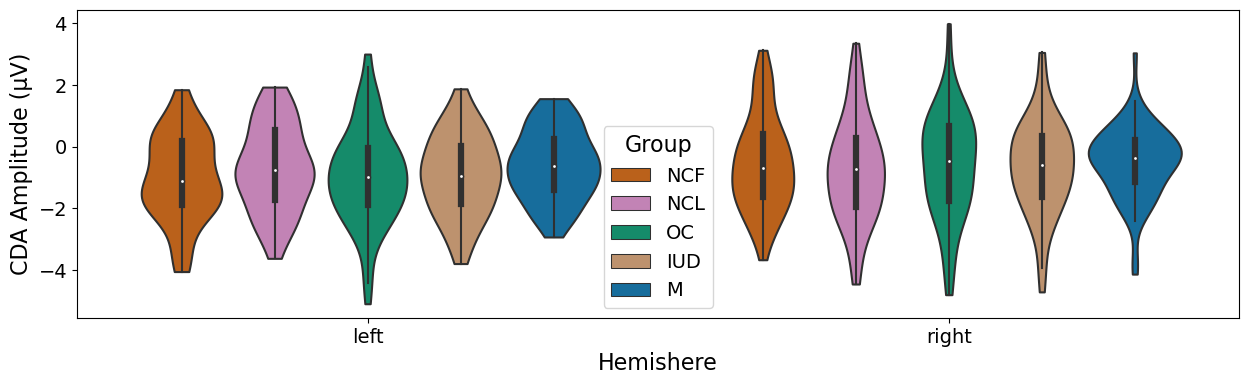

In [16]:
# Hemisphere and group
plt.figure(figsize = (15, 4))
sns.violinplot(x = 'hemisphere', y = 'mean_cda', data = avg_cda_condition, hue = 'group', hue_order = group_order, order = hf_order, cut = 0, split = False)
plt.ylabel('CDA Amplitude (µV)')
plt.xlabel('Hemishere')
plt.legend(title = 'Group')

# Save figure if needed
plt.savefig("CDA_group_hemisphere.png")

plt.show()

## Plot CDA Waves Between Groups

In [15]:
cda_po8 = pd.read_excel("PO8_contra_ipsi_CDA_removed_subjects.xlsx", sheet_name = "CDA")
cda_po7 = pd.read_excel("PO7_contra_ipsi_CDA_removed_subjects.xlsx", sheet_name = "CDA")

In [16]:
def load_cda_data(file_path):
    df = pd.read_excel(file_path, sheet_name='CDA')
    return df

def map_subject_to_group(subject_id):
    id_value = int(subject_id)
    if id_value < 100:
        return 'OC'
    elif id_value < 200:
        return 'IUD'
    elif id_value < 300:
        return 'NCF'
    elif id_value < 400:
        return 'NCL'
    elif id_value > 400:
        return 'M'
    else:
        return 'Unknown'

def average_cda_across_electrodes(po7_df, po8_df):
    avg_cda_df = pd.DataFrame()
    avg_cda_df['time'] = po7_df['time'].copy()
    
    # Using pd.concat to combine columns at once to avoid fragmentation
    combined_df = pd.concat([(po7_df.iloc[:, 1:] + po8_df.iloc[:, 1:]) / 2], axis=1)
    avg_cda_df = pd.concat([avg_cda_df, combined_df], axis=1)
    
    return avg_cda_df

def calculate_group_averages(df):
    time_column = df['time'].copy()
    group_data = {'OC': [], 'IUD': [], 'NCF': [], 'NCL': [], 'M': []}
    
    for col in df.columns[1:]:
        group = map_subject_to_group(col)
        if group != 'Unknown':
            group_data[group].append(df[col])
    
    group_averages = {}
    for group, data in group_data.items():
        if data:
            group_df = pd.concat(data, axis=1)
            group_averages[group] = group_df.mean(axis=1)
    
    group_averages['time'] = time_column
    return group_averages


In [17]:
# Load data from both hemispheres
po8_cda_data = load_cda_data('PO8_contra_ipsi_CDA_removed_subjects.xlsx')
po7_cda_data = load_cda_data('PO7_contra_ipsi_CDA_removed_subjects.xlsx')

# Calculate average CDA over PO7 and PO8 electrodes
avg_cda_df = average_cda_across_electrodes(po7_cda_data, po8_cda_data)

# Calculate group averages for the combined data
group_averages = calculate_group_averages(avg_cda_df)

In [24]:
# Map group names to colors
colors = {group: color for group, color in zip(group_order, groups_palette)}

def plot_group_cda_waves(group_averages, start_time_window, end_time_window, save_path=None):
    from matplotlib.patches import Rectangle
    fig, ax = plt.subplots(figsize=(12, 6))
    
    for group in group_order:
        if group in group_averages:
            ax.plot(group_averages['time'], group_averages[group], color=colors[group], label=group)
    
    ax.axhline(0, color='dimgray', linestyle='--')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Potential (µV)')

    # Customize the legend
    legend = ax.legend(title='Group', bbox_to_anchor=(1, 0.5), frameon=False)
    for text in legend.get_texts():
        text.set_fontsize(14)
    legend.get_title().set_fontsize(16)
    
    
    if start_time_window is not None and end_time_window is not None:
        ymin, ymax = ax.get_ylim()  # Get current y-axis limits
        rect = Rectangle((start_time_window, ymin), end_time_window - start_time_window, ymax - ymin, color='#CCCCCC', alpha=0.25, zorder=1)
        ax.add_patch(rect)
    
    plt.tight_layout()
    
    sns.despine(top=True, right=True)
    
    if save_path:
        plt.savefig(save_path, dpi=300)
    
    plt.show()

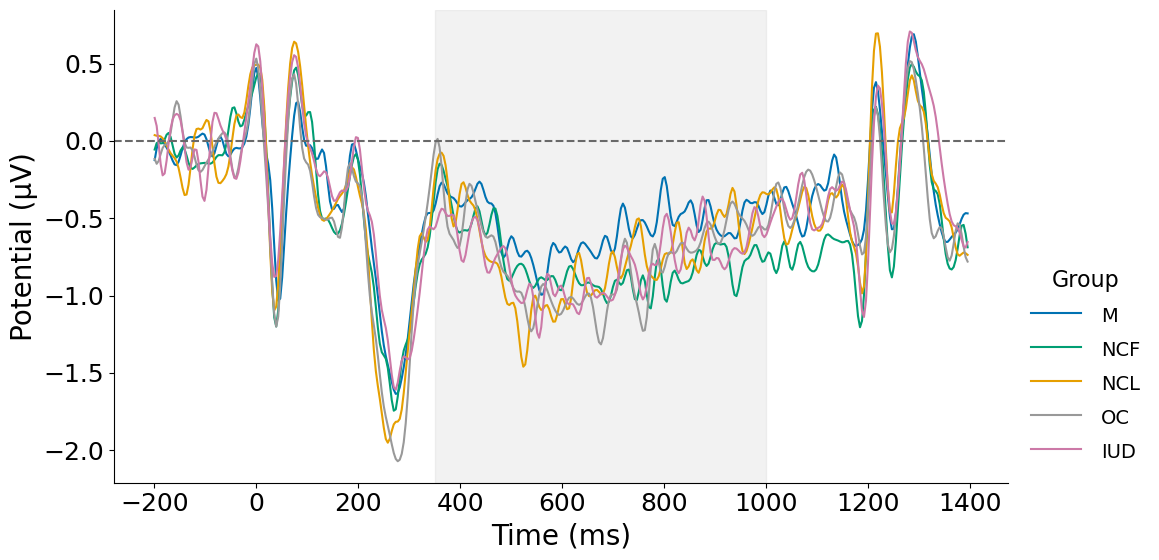

In [25]:
# Plot the combined group CDA waves
plot_group_cda_waves(group_averages, 350, 1000, save_path="figures/CDA_wave_between_groups.png")